## Freda intraclast data

Import scientific python packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Import functions from pmagpy (https://github.com/PmagPy/PmagPy)

In [2]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

Import data

In [3]:
BRIC_data_all = pd.read_csv('../Data/BRIC/specimens.txt', sep='\t', skiprows=1)
BRIC_data = BRIC_data_all.loc[BRIC_data_all.result_quality == 'g']

In [4]:
BRIC_data_tc = BRIC_data.loc[BRIC_data['dir_tilt_correction']==100.]
BRIC_MT_tc = BRIC_data_tc.loc[BRIC_data_tc['dir_comp']=='MT']
BRIC_MHT_tc = BRIC_data_tc.loc[BRIC_data_tc['dir_comp']=='MHT']
BRIC_HT_tc = BRIC_data_tc.loc[BRIC_data_tc['dir_comp']=='HT']

Plot data and calculate means

In [5]:
BRIC_MT_MHT_dec = BRIC_MT_tc.dir_dec.tolist() + BRIC_MHT_tc.dir_dec.tolist()
BRIC_MT_MHT_inc = BRIC_MT_tc.dir_inc.tolist() + BRIC_MHT_tc.dir_inc.tolist()

BRIC_MT_mean = ipmag.fisher_mean(BRIC_MT_MHT_dec, BRIC_MT_MHT_inc)
ipmag.print_direction_mean(BRIC_MT_mean)

Dec: 252.4  Inc: -12.5
Number of directions in mean (n): 37
Angular radius of 95% confidence (a_95): 6.6
Precision parameter (k) estimate: 13.6


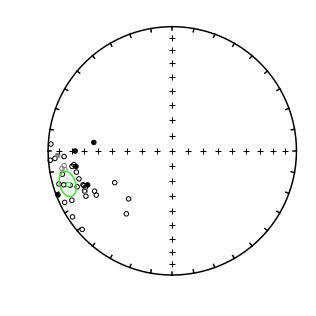

In [24]:
plt.figure(num=1, figsize=(4.5,4.5))
ipmag.plot_net(1)
ipmag.plot_di(BRIC_MT_tc.dir_dec.tolist(), BRIC_MT_tc.dir_inc.tolist(), color='k')
ipmag.plot_di(BRIC_MHT_tc.dir_dec.tolist(), BRIC_MHT_tc.dir_inc.tolist(), color='grey')
ipmag.plot_di_mean(BRIC_MT_mean['dec'], BRIC_MT_mean['inc'], BRIC_MT_mean['alpha95'], color='#4ED740', marker='s')
plt.savefig('code_output/BRIC_MT_MHT_dirs.pdf')
plt.show()

In [22]:
Michipicoten_Pole_direction = pmag.vgp_di(17.0,174.7,46.39,360-90.64)
Nonesuch_Pole_direction = pmag.vgp_di(7.3,174.7,46.39,360-90.64)
Freda_Pole_direction = pmag.vgp_di(2.2,179,46.39,360-90.64)
Freda_Pole_direction[0]

271.77830791119055

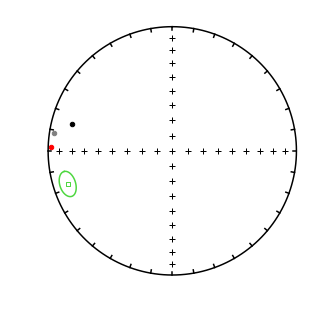

In [23]:
plt.figure(num=1, figsize=(4.5,4.5))
ipmag.plot_net(1)
ipmag.plot_di(Michipicoten_Pole_direction[0], Michipicoten_Pole_direction[1], color='black')
ipmag.plot_di(Nonesuch_Pole_direction[0], Nonesuch_Pole_direction[1], color='grey')
ipmag.plot_di(Freda_Pole_direction[0], Freda_Pole_direction[1], color='red')
ipmag.plot_di_mean(BRIC_MT_mean['dec'], BRIC_MT_mean['inc'], BRIC_MT_mean['alpha95'], color='#4ED740', marker='s')
plt.savefig('code_output/BRIC_MT_MHT_dirs.pdf')
plt.show()

In [7]:
BRIC_HT_mean = ipmag.fisher_mean(BRIC_HT_tc.dir_dec.tolist(), BRIC_HT_tc.dir_inc.tolist())
ipmag.print_direction_mean(BRIC_HT_mean)

Dec: 230.9  Inc: -20.5
Number of directions in mean (n): 27
Angular radius of 95% confidence (a_95): 33.9
Precision parameter (k) estimate: 1.7


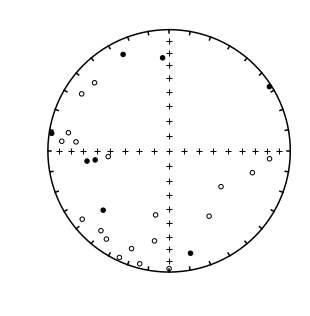

In [16]:
plt.figure(num=1, figsize=(4.5,4.5))
ipmag.plot_net(1)
ipmag.plot_di(BRIC_HT_tc.dir_dec.tolist(), BRIC_HT_tc.dir_inc.tolist(), color='k')
plt.savefig('code_output/BRIC_HT_dirs.pdf')
plt.show()

The high-temperature directions are more dispersed in declination than inclination.

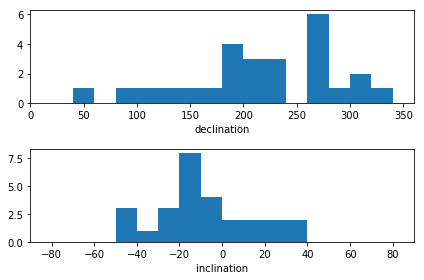

In [9]:
plt.subplot(2,1,1)
plt.hist(BRIC_HT_tc.dir_dec.tolist(),range(0,360,20))
plt.xlim(0,360)
plt.xlabel('declination')
plt.subplot(2,1,2)
plt.hist(BRIC_HT_tc.dir_inc.tolist(),range(-90,90,10))
plt.xlim(-90,90)
plt.xlabel('inclination')
plt.tight_layout()
plt.show()

In [10]:
print(np.mean(BRIC_HT_tc.dir_dec.tolist()))
print(np.std(BRIC_HT_tc.dir_dec.tolist()))
print('')
print(np.mean(BRIC_HT_tc.dir_inc.tolist()))
print(np.std(BRIC_HT_tc.dir_inc.tolist()))

220.7814814814815
72.78788583089317

-8.981481481481481
22.852960534963955


The data are not consistent with an entirely random distribution

In [11]:
ipmag.conglomerate_test_Watson(BRIC_MT_mean['r'],BRIC_MT_mean['n'])

R = 34.354895376665695
Ro_95 = 9.817586261398471
Ro_99 = 11.828848915539782
The null hypothesis of randomness can be rejected at the 95% confidence level
The null hypothesis of randomness can be rejected at the 99% confidence level


{'n': 37,
 'R': 34.354895376665695,
 'Ro_95': 9.817586261398471,
 'Ro_99': 11.828848915539782}

In [12]:
ipmag.conglomerate_test_Watson(BRIC_HT_mean['r'],BRIC_HT_mean['n'])

R = 11.303944668686482
Ro_95 = 8.386596449096618
Ro_99 = 10.104701875859574
The null hypothesis of randomness can be rejected at the 95% confidence level
The null hypothesis of randomness can be rejected at the 99% confidence level


{'n': 27,
 'R': 11.303944668686482,
 'Ro_95': 8.386596449096618,
 'Ro_99': 10.104701875859574}

## Plot demagnetization data

In [52]:
BRIC_measurements_all = pd.read_csv('../Data/BRIC/measurements.txt', sep='\t', skiprows=1)
BRIC_measurements = BRIC_measurements_all.loc[BRIC_measurements_all.quality == 'g']

In [32]:
BRIC_measurements_BRIC31 = BRIC_measurements[BRIC_measurements.specimen == 'BRIC.31a']
BRIC_measurements_BRIC31.reset_index(inplace=True)
BRIC_measurements_BRIC33 = BRIC_measurements[BRIC_measurements.specimen == 'BRIC.33a']
BRIC_measurements_BRIC33.reset_index(inplace=True)
BRIC_measurements_BRIC41 = BRIC_measurements[BRIC_measurements.specimen == 'BRIC.41a']
BRIC_measurements_BRIC41.reset_index(inplace=True)

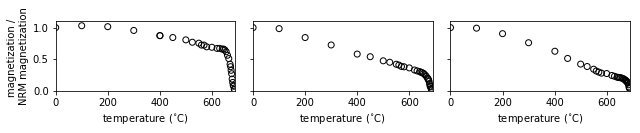

In [51]:
plt.figure(figsize=(9,1.8))
plt.subplot(1,3,1)
plt.scatter(BRIC_measurements_BRIC31.treat_temp-273,
            BRIC_measurements_BRIC31.magn_moment/BRIC_measurements_BRIC31.magn_moment[0],
            facecolors='none', edgecolors='k')
plt.xlim(0,690)
plt.ylim(0,1.1)
plt.ylabel('magnetization / \nNRM magnetization')
plt.xlabel('temperature ($^{\circ}$C)')
plt.subplot(1,3,2)
plt.scatter(BRIC_measurements_BRIC33.treat_temp-273,
            BRIC_measurements_BRIC33.magn_moment/BRIC_measurements_BRIC33.magn_moment[0],
            facecolors='none', edgecolors='k')
plt.xlim(0,690)
plt.ylim(0,1.1)
plt.xlabel('temperature ($^{\circ}$C)')
plt.gca().set_yticklabels([])
plt.subplot(1,3,3)
plt.scatter(BRIC_measurements_BRIC41.treat_temp-273,
            BRIC_measurements_BRIC41.magn_moment/BRIC_measurements_BRIC41.magn_moment[0],
            facecolors='none', edgecolors='k')
plt.xlim(0,690)
plt.ylim(0,1.1)
plt.xlabel('temperature ($^{\circ}$C)')
plt.gca().set_yticklabels([])
plt.tight_layout()
plt.savefig('./code_output/demag.svg')
plt.show()